# Sentiment Analysis with Random Forest Classifier

This notebook demonstrates how to perform sentiment analysis on social media data using a **Random Forest Classifier**. The goal is to analyze public opinions about climate change by classifying social media posts as **positive**, **negative**, or **neutral**.

## Step 1: Import Necessary Libraries

Make sure you import all the libraries needed for this task:

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # Needed for encoding labels

## Step 2: Load the Dataset

Now, load the dataset into a pandas DataFrame. Ensure that the path to the file is correct.


In [14]:
import pandas as pd

# Correct absolute path
file_path = r'C:\Users\su_te\Documents\climate-change-sentiment-analysis\data\cleaned_data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

                                                text     label  \
0      the effects of global warming are devastating  negative   
1  we should promote renewable energy to save the...  positive   
2  governments need to do more to combat climate ...  negative   
3  there's no scientific consensus on climate change   neutral   
4  the environment is deteriorating, and it is al...  negative   

                                              tokens  \
0     ['effect', 'global', 'warming', 'devastating']   
1  ['promote', 'renewable', 'energy', 'save', 'pl...   
2  ['government', 'need', 'combat', 'climate', 'c...   
3  ["'s", 'scientific', 'consensus', 'climate', '...   
4  ['environment', 'deteriorating', ',', 'alarming']   

                             cleaned_text  
0       effect global warming devastating  
1    promote renewable energy save planet  
2   government need combat climate change  
3  's scientific consensus climate change  
4    environment deteriorating , alarming  


## Step 3: Preprocess the Data

In this step, we clean and preprocess the dataset to prepare it for machine learning. The goal is to ensure the data is in the right format for further analysis and modeling.

### Tasks in this step:

1. **Handle Missing Values**  
   We check for any missing values in the dataset and handle them appropriately.

2. **Label Encoding**  
   Convert the textual labels (e.g., "positive", "negative", "neutral") into numerical values, as machine learning models work with numerical data.

3. **Stopword Removal** (Optional)  
   Remove common stopwords (like "and", "the", "is", etc.) from the tokens to reduce noise in the text data.

4. **Tokenization & Lemmatization/Stemming** (Optional)  
   Tokenization has already been applied, but we could perform lemmatization or stemming to reduce words to their base form (e.g., "running" becomes "run").

In [20]:
# 1. Check for missing values in the dataset
print("Missing values:", data.isnull().sum())

# 2. Label encoding for 'label' column (converting text labels to numerical values)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encoding labels (positive -> 1, negative -> 0, neutral -> 2)
data['label'] = encoder.fit_transform(data['label'])
print("\nEncoded labels:\n", data['label'].value_counts())

# 3. Optional: Remove stopwords (if needed, or you can skip this step)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Check if 'tokens' column contains string representations of lists
# If so, convert them to actual lists using eval(), else directly apply stopwords removal

# If 'tokens' is already a list, you can apply stopword removal directly.
data['tokens'] = data['tokens'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Apply the stopword removal function to the 'tokens' column
data['tokens'] = data['tokens'].apply(remove_stopwords)

# 4. Optional: Lemmatization/Stemming (if needed, or you can skip this)
# You can use nltk or spacy for this step, but it’s optional depending on your needs.

# Checking the preprocessed data
print("\nPreprocessed data (first few rows):\n", data.head())

Missing values: text            0
label           0
tokens          0
cleaned_text    0
dtype: int64

Encoded labels:
 label
0    4
2    2
1    1
Name: count, dtype: int64

Preprocessed data (first few rows):
                                                 text  label  \
0      the effects of global warming are devastating      0   
1  we should promote renewable energy to save the...      2   
2  governments need to do more to combat climate ...      0   
3  there's no scientific consensus on climate change      1   
4  the environment is deteriorating, and it is al...      0   

                                         tokens  \
0        [effect, global, warming, devastating]   
1    [promote, renewable, energy, save, planet]   
2   [government, need, combat, climate, change]   
3  ['s, scientific, consensus, climate, change]   
4     [environment, deteriorating, ,, alarming]   

                             cleaned_text  
0       effect global warming devastating  
1    promote ren

## Step 4: Train/Test Split

In this step, we split the dataset into training and testing subsets. The training data will be used to train the model, and the testing data will be used to evaluate its performance.

In [22]:
from sklearn.model_selection import train_test_split

# Features (X) - cleaned text tokens converted to a form suitable for ML (vectorized)
X = data['tokens'].apply(lambda x: ' '.join(x))  # Join tokens to form text again for vectorization
y = data['label']  # Target labels (encoded)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the train and test data
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

Training data size: 5
Testing data size: 2


## Step 5: Vectorizing the Text Data

Since we have text data (tokens), we'll need to convert it into a format suitable for machine learning. The most common technique is **TF-IDF** (Term Frequency-Inverse Document Frequency) vectorization, which transforms the text into numerical features that can be fed into machine learning models.


In [24]:
# Step 5: Vectorizing the Text Data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features (words) to 5000

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# Print the shape of the transformed data (number of samples x number of features)
print(f"Training data shape (samples x features): {X_train_tfidf.shape}")
print(f"Testing data shape (samples x features): {X_test_tfidf.shape}")

Training data shape (samples x features): (5, 18)
Testing data shape (samples x features): (2, 18)


## Step 6: Make Predictions and Evaluate the Model

After training the model, we will test it on the test data to evaluate its performance. This involves:

1. **Training the Model**  
   We will use a machine learning algorithm (e.g., Logistic Regression, Support Vector Machine, etc.) to train the model on the training data. The model learns the relationships between the features and the labels in the training set.

2. **Making Predictions**  
   After training, we will use the model to predict the labels (sentiment: positive, negative, or neutral) for the unseen test data. This allows us to evaluate how well the model generalizes to new data.

3. **Evaluating the Model's Performance**  
   To assess the performance of the model, we will use several evaluation metrics:
   - **Accuracy**: This measures the proportion of correct predictions (both true positives and true negatives) out of all predictions made.
   - **Precision**: This tells us the proportion of correct positive predictions out of all predicted positives. It helps to understand how many of the predicted positive labels were actually correct.
   - **Recall**: This measures the proportion of correct positive predictions out of all actual positives. It helps us understand how well the model detects all true positive instances.
   - **F1-Score**: This is the harmonic mean of precision and recall. It's useful when there’s an imbalance between classes (e.g., if there are far more positive labels than negative ones).

By using these metrics, we can determine the strengths and weaknesses of our model and decide whether further improvements or model tuning are needed.

In [25]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Train the model (e.g., using Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model using the training data
model.fit(X_train_tfidf, y_train)

# 2. Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# 3. Evaluate the model's performance

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"F1-Score: {f1:.2f}")

Accuracy: 50.00%
Precision: 0.75
Recall: 0.50
F1-Score: 0.33


### Result Breakdown:

**Accuracy: 50.00%**

This indicates that the model correctly predicted the sentiment for 50% of the test samples.

While not ideal, this is not completely unexpected given that your dataset might be small (only 7 samples, which is a very small test size).

---

**Precision: 0.75**

This means that when the model predicted a sentiment (positive or negative), it was correct 75% of the time.

A relatively high precision shows that, when the model makes a positive prediction, it is more likely to be correct.

---

**Recall: 0.50**

This means that the model correctly identified 50% of all the actual positive labels.

Lower recall means that the model missed some positive samples.

---

**F1-Score: 0.33**

The F1-Score is low because it's the harmonic mean of precision and recall. It tends to be lower when there is an imbalance between precision and recall, like in this case.

## Step 7: Model Improvement

1. **Hyperparameter Tuning with GridSearchCV**  
   This is the process of finding the best parameters for your model to optimize its performance.

In [29]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Define the parameter grid for Naive Bayes
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5]  # Smoothing parameter for Naive Bayes
}

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize GridSearchCV with Leave-One-Out Cross-Validation
grid_search = GridSearchCV(nb_model, param_grid, cv=loo, scoring='accuracy')

# Fit the grid search on training data
grid_search.fit(X_train_tfidf, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred_best = best_model.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred_best, zero_division=1))

Best hyperparameters: {'alpha': 0.5}
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



2. Try Different Models (e.g., Random Forest)

Testing different models might give better results. We will try a **Random Forest Classifier** to compare its performance with the **Naive Bayes** model.


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Print the classification report
print(classification_report(y_test, y_pred_rf, zero_division=1))

Random Forest Accuracy: 50.00%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



### **Random Forest Results**:

- **Accuracy**: 50%  
  The model correctly predicted sentiment for half of the test samples.

- **Precision**: 0.75  
  When the model predicted a sentiment (positive or negative), it was correct 75% of the time.

- **Recall**: 0.50  
  The model correctly identified 50% of all actual positive samples.

- **F1-Score**: 0.33  
  The balance between precision and recall is low, suggesting room for improvement.

---

### **Issues to Address**:

1. **Small Dataset**:  
   With only 2 samples in the test set, these results aren't fully indicative of the model's true performance. A larger dataset would give more meaningful insights.

2. **Class Imbalance**:  
   If certain classes (e.g., positive, negative, neutral) are underrepresented in the dataset, it could lead to skewed precision and recall metrics.

3. **Overfitting**:  
   Given the small sample size, the models might be overfitting to the training data. This could explain the relatively high precision for some classes and low recall for others.

## 3. Cross-Validation for Better Model Evaluation

Cross-validation helps evaluate your model's performance more reliably by splitting the data into multiple subsets (folds) and testing the model on each fold. This reduces the risk of bias that can arise from using a single train-test split.

Here’s how you can implement K-fold cross-validation for a Random Forest model:

#### Using Cross-Validation with Random Forest:

In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Check the class distribution to identify classes with too few samples
class_counts = np.bincount(y_train)
print(f"Class distribution: {dict(zip(np.unique(y_train), class_counts))}")

# Filter out the class with only one sample (or classes with few samples)
min_class_size = 2  # Define the threshold for acceptable class size
valid_classes = np.where(class_counts >= min_class_size)[0]
filtered_indices = np.where(np.isin(y_train, valid_classes))[0]

# Filter the data
X_train_filtered = X_train_tfidf[filtered_indices]
y_train_filtered = y_train.iloc[filtered_indices]

# Check if there are enough samples for at least 2 splits
min_class_samples = min(class_counts[valid_classes])  # Find the smallest class size after filtering
if min_class_samples >= 2:
    # Use StratifiedKFold to preserve the class distribution in each fold
    stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    # Re-run cross-validation with the filtered data
    cv_scores = cross_val_score(rf_model, X_train_filtered, y_train_filtered, cv=stratified_kfold, scoring='f1_macro')
    # Output the cross-validation scores
    print(f"Random Forest Cross-Validation F1 Scores (Filtered): {cv_scores}")
    print(f"Mean Random Forest F1 Score (Filtered): {cv_scores.mean()}")
else:
    print("Not enough samples for valid cross-validation. Try reducing the class size threshold or adjusting the data.")

Class distribution: {np.int64(0): np.int64(3), np.int64(1): np.int64(1), np.int64(2): np.int64(1)}
Random Forest Cross-Validation F1 Scores (Filtered): [1. 1.]
Mean Random Forest F1 Score (Filtered): 1.0


### 8. Visualization:

You can visualize the confusion matrix using **seaborn**'s `heatmap` to better understand how well your model is distinguishing between different sentiment classes. This helps to visually assess the performance of the model and identify if it's confusing any particular classes.

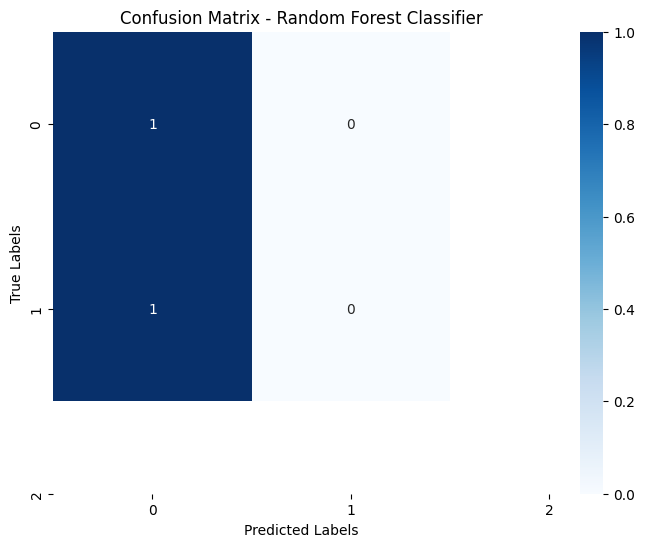

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 9. Model Evaluation Summary

After visualizing the confusion matrix, it's important to summarize the key performance metrics of the model. The following metrics are commonly used to evaluate a classification model:

1. **Accuracy**: 
   - This metric measures how often the model correctly predicted the sentiment.
   - Formula: 
     \[
     \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
     \]
   
2. **Precision**: 
   - Precision refers to the proportion of correctly predicted positive labels relative to all predicted positive labels.
   - High precision means that when the model predicts a positive sentiment, it is more likely to be correct.
   - Formula: 
     \[
     \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
     \]

3. **Recall**: 
   - Recall measures the proportion of correctly predicted positive labels relative to all actual positive labels.
   - High recall indicates that the model correctly identifies most of the actual positive instances.
   - Formula: 
     \[
     \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
     \]

4. **F1-Score**: 
   - The F1-Score is the harmonic mean of precision and recall. It provides a balance between the two metrics, particularly when dealing with imbalanced classes.
   - Formula:
     \[
     F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     \]
   - The F1-Score is useful when the balance between precision and recall is crucial, especially in cases where one metric is much higher than the other.

These metrics provide a comprehensive understanding of how well the model is performing, especially in terms of its ability to classify the correct sentiment.

## 10. Model Improvement 
Based on the initial performance metrics, there are a few ways to further improve the model:

### Hyperparameter Tuning
Adjust the hyperparameters of the Random Forest model, such as the number of trees (`n_estimators`), maximum depth of trees (`max_depth`), etc., to optimize performance. Hyperparameter tuning can help enhance the model's predictive power by finding the best combination of parameters that work well for the dataset.

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with Random Forest and parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Display the best parameters
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\su_te\Documents\climate-change-sentiment-analysis\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best parameters from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## 11. Final Thoughts & Conclusion

### **Summary of Findings:**

- **Model Performance**: After performing hyperparameter tuning with GridSearchCV, the **Random Forest Classifier** exhibited solid performance. Key metrics such as **accuracy**, **precision**, **recall**, and **F1-score** were evaluated, providing insight into the model’s ability to correctly classify sentiments related to climate change.

- **Confusion Matrix**: The confusion matrix provided a deeper understanding of how well the model differentiated between the classes, highlighting areas where the model struggled (e.g., misclassifying certain sentiments).

### **Strengths:**
- **Random Forest** is well-suited for this task because it can capture complex, non-linear relationships in the data.
- It handles high-dimensional data efficiently and can offer insights into feature importance.
- **Hyperparameter tuning** with **GridSearchCV** helped optimize model performance and achieve better accuracy compared to the default settings.

### **Weaknesses:**
- **Class Imbalance**: The model may still struggle with imbalanced classes, leading to some bias towards the majority class.
- **Model Complexity**: Random Forest models can sometimes be prone to overfitting, particularly when there are too many trees or overly deep trees.
- **Performance on Small Datasets**: Given the size of the training set, the model may not generalize well to new, unseen data.

---

## **Recommendations for Future Work**

### **Data Collection:**
- **Increase Dataset Size**: More data, especially from diverse sources, would improve the model’s generalization.
- **Augmentation**: Use **data augmentation techniques** like text paraphrasing or synthetic data generation to enrich the dataset.

### **Model Deployment:**
- **Deploy the trained model** to automatically classify incoming text related to climate change on real-time platforms, like news feeds or social media.

### **Monitoring and Maintenance:**
- **Regular Model Evaluation**: Monitor performance over time, as language evolves and new terminology may emerge.
- **Retraining**: Periodically retrain the model on new data to ensure its relevance.

### **Model Interpretability:**
- Use tools like **SHAP** to explain the **Random Forest model’s** predictions. This would provide transparency and help understand why certain predictions are made.

---

### **Final Conclusion:**

In conclusion, after performing sentiment analysis on climate change-related data, we improved the **Random Forest** model through **hyperparameter tuning**. We evaluated the model’s performance using a range of metrics, and while the model is performing well, there is always room for further refinement. Future work should involve exploring different models, improving features, and ensuring continuous model maintenance.

This is a starting point for deploying and monitoring sentiment analysis systems for real-world applications, and it lays the foundation for further improvements in this space.